In [9]:
from typing import Annotated
from zipfile import ZipFile

import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from Tools.i18n.makelocalealias import optimize
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.python.ops.ragged.ragged_util import lengths_to_splits

tf.__version__

'2.10.0'

In [5]:
zip_path = './dados/Datasets/cat_dog_2.zip'
with(zipfile.ZipFile(zip_path, 'r')) as f:
    f.extractall()
    f.close()

In [13]:
train_ds =  image_dataset_from_directory(
    './cat_dog_2/training_set',
    label_mode='categorical',
    image_size=(256, 256),
    class_names=['dog', 'cat'],
    shuffle=True,
    batch_size=32,

)

test_ds = image_dataset_from_directory(
    './cat_dog_2/test_set',
    label_mode='categorical',
    image_size=(256, 256),
    class_names=['dog', 'cat'],
    shuffle=False,
    batch_size=32,
)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [28]:
batch_test = train_ds.take(1)
for img, rotulo in batch_test:
    print(img.shape)
    print(rotulo.shape)

(32, 256, 256, 3)
(32, 2)


In [30]:

modelo_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False,
                                             input_tensor=Input(shape=(256, 256, 3)))

In [15]:
modelo_base.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [36]:
modelo_base.trainable = False
training_layer_limit = 150
for layer in modelo_base.layers[:training_layer_limit]:
    layer.trainable = True

len(modelo_base.layers)

175

In [39]:
head_model = modelo_base.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units=1025, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(units=1025, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(units=2, activation='softmax')(head_model)


In [40]:
model = Model(inputs=modelo_base.input, outputs=head_model)
len(model.layers)

181

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, epochs=10)

Epoch 1/10
125/125 [==============================] - 49s 341ms/step - loss: 0.2005 - accuracy: 0.9187
Epoch 2/10
125/125 [==============================] - 42s 334ms/step - loss: 0.1431 - accuracy: 0.9425
Epoch 3/10
125/125 [==============================] - 41s 326ms/step - loss: 0.1284 - accuracy: 0.9517
Epoch 4/10
125/125 [==============================] - 41s 327ms/step - loss: 0.1096 - accuracy: 0.9607
Epoch 5/10
125/125 [==============================] - 40s 320ms/step - loss: 0.1135 - accuracy: 0.9555
Epoch 6/10
125/125 [==============================] - 40s 320ms/step - loss: 0.0760 - accuracy: 0.9712
Epoch 7/10
125/125 [==============================] - 41s 327ms/step - loss: 0.0857 - accuracy: 0.9663
Epoch 8/10
125/125 [==============================] - 40s 318ms/step - loss: 0.0777 - accuracy: 0.9735
Epoch 9/10
125/125 [==============================] - 40s 319ms/step - loss: 0.0590 - accuracy: 0.9778
Epoch 10/10
125/125 [==============================] - 40s 315ms/step - l

In [63]:
predict = model.predict(test_ds)
predict = np.argmax(predict, axis=1)
len(predict)
predict

32/32 [==============================] - 3s 111ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
labels = np.concatenate([y for _, y in test_ds])
labels = np.argmax(labels, axis=1)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
from sklearn.metrics import accuracy_score

accurancy = accuracy_score(labels, predict)
accurancy

0.839

<Axes: >

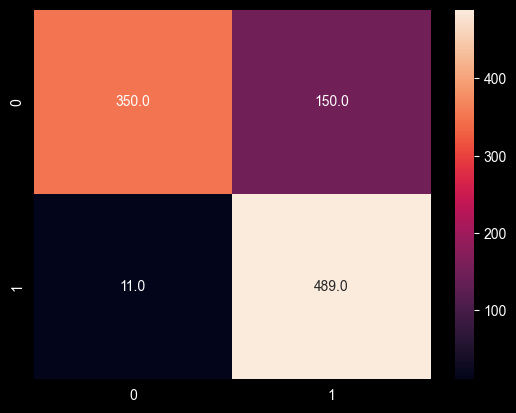

In [70]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
cm = confusion_matrix(labels, predict)
heatmap(cm, annot=True, fmt='.1f')


